In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X=np.empty((100,2))
X[:,0]=np.random.uniform(0.,100.,size=100)
X[:,1]=0.75*X[:,0]+3.+np.random.normal(0.,10.,size=100)

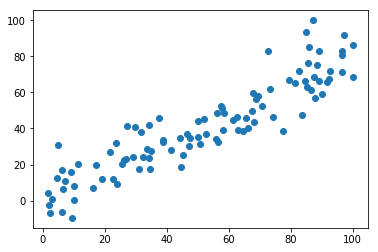

In [3]:
plt.scatter(X[:,0],X[:,1])

### demean

In [4]:
def demean(X):
    return X-np.mean(X,axis=0)

In [5]:
X_demean=demean(X)

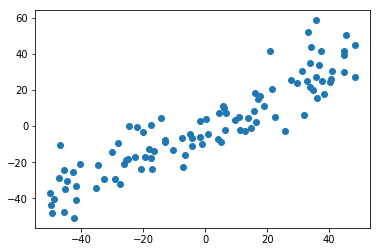

In [6]:
plt.scatter(X_demean[:,0],X_demean[:,1])

### 梯度上升法

In [7]:
def f(w,x):
    return np.sum((X.dot(w)**2))/len(X)

In [8]:
def df_math(w,X):
    return X.T.dot(X.dot(w))*2./len(X)

In [9]:
def df_debug(w,X,epsilon=0.0001):
    res=np.empty(len(w))
    for i in range(len(w)):
        w_1=w.copy()
        w_1[i]+=epsilon
        w_2=w.copy()
        w_2[i]-=epsilon
        res[i]=(f(w_1,X_b,y)-f(w_2,X_b,y))/(2*epsilon)
    return res

In [10]:
#单位方向向量
def direction(w):
    return w/np.linalg.norm(w)

def gradient_ascent(df,X,initial_w,eta,n_iters=1e4,epsilon=1e-8):
    w=direction(initial_w)
    i_iter=0
    
    while i_iter<n_iters:
        gradient=df_math(w,X)
        last_w=w
        w=w+eta*gradient
        w=direction(w)  #注意 每次求一个单位向量
        if(abs(f(w,X)-f(last_w,X))<epsilon):
            break
        i_iter+=1
    return w

In [11]:
initial_w=np.random.random(X.shape[1])  #注意 不能用0向量开始
initial_w

array([0.78025798, 0.60953574])

In [12]:
eta=0.01

In [13]:
#注意 不能用StandarScaler标准化数据

In [14]:
w=gradient_ascent(df_debug,X_demean,initial_w,eta)

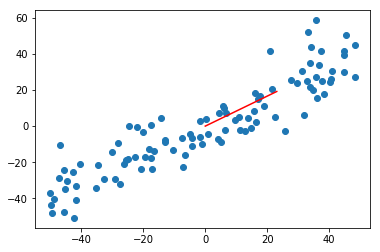

In [15]:
plt.scatter(X_demean[:,0],X_demean[:,1])
plt.plot([0,w[0]*30],[0,w[1]*30],color='r')

In [16]:
w

array([0.76859955, 0.6397302 ])

### 前n个主成分